In [1]:
from google.colab import files
import os
files.upload()
os.listdir()
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json
import kaggle
print("Imported kaggle api successfully !")
!kaggle competitions download -c titanic
print("Downloaded Titanic dataset successfully!")

Saving kaggle.json to kaggle.json
Imported kaggle api successfully !
  0% 0.00/59.8k [00:00<?, ?B/s]
100% 59.8k/59.8k [00:00<00:00, 58.0MB/s]
  0% 0.00/28.0k [00:00<?, ?B/s]
100% 28.0k/28.0k [00:00<00:00, 23.8MB/s]
  0% 0.00/3.18k [00:00<?, ?B/s]
100% 3.18k/3.18k [00:00<00:00, 3.19MB/s]
Downloaded Titanic dataset successfully!


In [0]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [0]:
from sklearn.ensemble import (RandomForestClassifier,
                             AdaBoostClassifier,
                             GradientBoostingClassifier)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import (GridSearchCV,
                                     cross_val_score,
                                     StratifiedKFold, 
                                     learning_curve)

## Loading the dataset

In [5]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
ids = test['PassengerId']
print('Train shape : ',train.shape)
print('Test shape : ',test.shape)

Train shape :  (891, 12)
Test shape :  (418, 11)


In [6]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Cleaning and preprocessing the dataset

In [8]:
train.isna().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

In [9]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [10]:
train['Embarked'].fillna('S',inplace=True)
train.isna().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         0
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

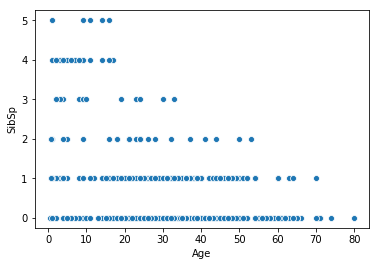

In [11]:
sns.scatterplot(x='Age',y='SibSp',data=train)

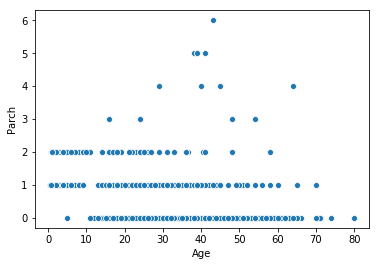

In [12]:
sns.scatterplot(x='Age',y='Parch',data=train)

In [13]:
train[['Age','SibSp']].groupby('SibSp').median()

,Age
SibSp,
0,29.0
1,30.0
2,23.0
3,9.5
4,6.5
5,11.0
8,NaN


In [14]:
train[['Age','SibSp']].groupby('SibSp').mean()

,Age
SibSp,
0,31.397558
1,30.089727
2,22.620000
3,13.916667
4,7.055556
5,10.200000
8,NaN


In [15]:
train[['Age','Parch']].groupby('Parch').median()

,Age
Parch,
0,30.0
1,23.0
2,16.5
3,24.0
4,42.5
5,39.0
6,43.0


In [16]:
train[['Age','Parch']].groupby('Parch').mean()

,Age
Parch,
0,32.178503
1,24.422000
2,17.216912
3,33.200000
4,44.500000
5,39.200000
6,43.000000


In [17]:
train[train['SibSp']==8]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


We see that all the members are either Miss, Master or Mr. which suggests that there was no children or son or daughter. We can fill the mean or median values to age.

In [18]:
print('Mean of age is : ',train['Age'].mean())
print('Median of age is : ',train['Age'].median())

Mean of age is :  29.69911764705882
Median of age is :  28.0


In [0]:
train['Age'].fillna(train['Age'].median(),inplace=True)

In [20]:
train.isna().sum().sort_values(ascending=False)

Cabin          687
Embarked         0
Fare             0
Ticket           0
Parch            0
SibSp            0
Age              0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

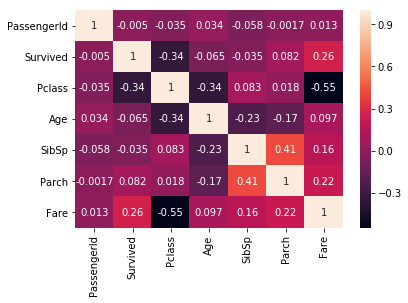

In [21]:
## lets check the heatmap before decided about the cabin column
sns.heatmap(train.corr(),annot=True)

From the above the map, we  can find the following relations :

1. Fare and survived

2. Fare and SibSp

3. Fare and Parch

4. Parch and SIbSp

5. Age and fare (less correlated but still positive)

In [22]:
## lets add family size and check the correlation then
train['FamilySize'] = train['Parch'] + train['SibSp'] +1
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


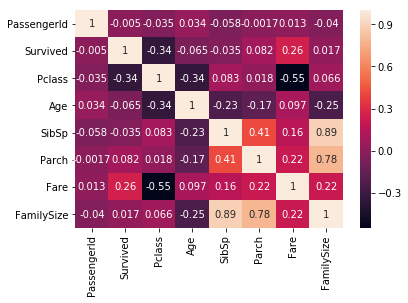

In [23]:
sns.heatmap(train.corr(),annot=True)

we see that after adding familysize feature, we have a very strong correlation between sibsp& parch (expected)

We can also split the family column into type of family. (small medium n large)

In [24]:
train['Single'] = train['FamilySize'].map(lambda i: 1 if i==1 else 0)
train['Small'] = train['FamilySize'].map(lambda i: 1 if i==2 else 0)
train['Medium'] = train['FamilySize'].map(lambda i: 1 if 3<=i<=4 else 0)
train['Large'] = train['FamilySize'].map(lambda i: 1 if i>4 else 0)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Single,Small,Medium,Large
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,1,0,0,0


Similarly, lets map the sex column

In [25]:
train['Sex'] = train['Sex'].map(lambda i : 1 if i=='male' else 0)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Single,Small,Medium,Large
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,2,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,2,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,2,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,1,1,0,0,0


In [26]:
train['Embarked_S'] = train['Embarked'].map(lambda i: 1 if i=='S' else 0)
train['Embarked_C'] = train['Embarked'].map(lambda i: 1 if i=='C' else 0)
train['Embarked_Q'] = train['Embarked'].map(lambda i: 1 if i=='Q' else 0)
train.drop(['Embarked'],axis=1,inplace=True)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,FamilySize,Single,Small,Medium,Large,Embarked_S,Embarked_C,Embarked_Q
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2,0,1,0,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,2,0,1,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,1,0,0,0,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2,0,1,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,1,1,0,0,0,1,0,0


Lets take a look at name feature


In [0]:
titles = [i.split(',')[1].split('.')[0].strip() for i in train['Name']]

In [28]:
train['Title'] = pd.Series(titles)
train['Title'].head()

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: Title, dtype: object

In [29]:
train['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Major             2
Mlle              2
Don               1
Ms                1
Mme               1
Lady              1
Jonkheer          1
Capt              1
the Countess      1
Sir               1
Name: Title, dtype: int64

Many surnames are similar and some are very rare. So we can split them into 2 categories: Rare and frequent. In frequent we can split into very common surnames such as Mr. Ms. etc

In [0]:
rare_surnames = ['Rev','Col','Mlle','Don','Mme','Jonkheer','the Countess']
mapping_other_surnames = {'Mr':1,
                         'Mrs':2,
                         'Miss':2,
                         'Master':1,
                         'Dr':3,
                         'Col':1,
                         'Major':3,
                         'Ms':2,
                         'Lady':2,
                         'Capt':3,
                         'Sir':1,
                         'Rare':4}
train['Title'] = train['Title'].replace(rare_surnames,'Rare')
train['Title'] = train['Title'].map(mapping_other_surnames)
train['Title']=train['Title'].astype(int)

In [31]:
train['Title'].head()

0    1
1    2
2    2
3    2
4    1
Name: Title, dtype: int64

In [32]:
train.drop(['Name'],axis=1,inplace=True)
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,FamilySize,Single,Small,Medium,Large,Embarked_S,Embarked_C,Embarked_Q,Title
0,1,0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,2,0,1,0,0,1,0,0,1
1,2,1,1,0,38.0,1,0,PC 17599,71.2833,C85,2,0,1,0,0,0,1,0,2
2,3,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,1,0,0,0,1,0,0,2
3,4,1,1,0,35.0,1,0,113803,53.1000,C123,2,0,1,0,0,1,0,0,2
4,5,0,3,1,35.0,0,0,373450,8.0500,NaN,1,1,0,0,0,1,0,0,1


Lets drop passenger Id and take a look at Cabin feature

In [0]:
train.drop(['PassengerId'],axis=1,inplace=True)

In [34]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,FamilySize,Single,Small,Medium,Large,Embarked_S,Embarked_C,Embarked_Q,Title
0,0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,2,0,1,0,0,1,0,0,1
1,1,1,0,38.0,1,0,PC 17599,71.2833,C85,2,0,1,0,0,0,1,0,2
2,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,1,0,0,0,1,0,0,2
3,1,1,0,35.0,1,0,113803,53.1000,C123,2,0,1,0,0,1,0,0,2
4,0,3,1,35.0,0,0,373450,8.0500,NaN,1,1,0,0,0,1,0,0,1


In [35]:
train['Cabin'].describe()

count             204
unique            147
top       C23 C25 C27
freq                4
Name: Cabin, dtype: object

In [36]:
train['Cabin'][1][0]

'C'

In [37]:
train['Cabin'] = pd.Series([i[0] if not pd.isnull(i) else 'X' for i in train['Cabin']])
train['Cabin'].head()

0    X
1    C
2    X
3    C
4    X
Name: Cabin, dtype: object

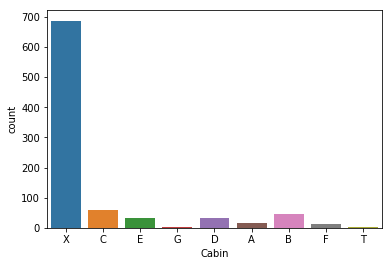

In [38]:
sns.countplot(train['Cabin'])

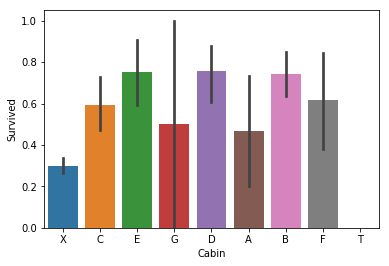

In [39]:
sns.barplot(x='Cabin',y='Survived',data=train)

In [40]:
train['Cabin'].value_counts()

X    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

In [0]:
train = pd.get_dummies(train,columns=['Cabin'],prefix='Cabin')

In [42]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,FamilySize,Single,...,Title,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_X
0,0,3,1,22.0,1,0,A/5 21171,7.2500,2,0,...,1,0,0,0,0,0,0,0,0,1
1,1,1,0,38.0,1,0,PC 17599,71.2833,2,0,...,2,0,0,1,0,0,0,0,0,0
2,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,1,1,...,2,0,0,0,0,0,0,0,0,1
3,1,1,0,35.0,1,0,113803,53.1000,2,0,...,2,0,0,1,0,0,0,0,0,0
4,0,3,1,35.0,0,0,373450,8.0500,1,1,...,1,0,0,0,0,0,0,0,0,1


In [0]:
train.drop(['Ticket'],axis=1,inplace=True)

In [44]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,FamilySize,Single,Small,...,Title,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_X
0,0,3,1,22.0,1,0,7.2500,2,0,1,...,1,0,0,0,0,0,0,0,0,1
1,1,1,0,38.0,1,0,71.2833,2,0,1,...,2,0,0,1,0,0,0,0,0,0
2,1,3,0,26.0,0,0,7.9250,1,1,0,...,2,0,0,0,0,0,0,0,0,1
3,1,1,0,35.0,1,0,53.1000,2,0,1,...,2,0,0,1,0,0,0,0,0,0
4,0,3,1,35.0,0,0,8.0500,1,1,0,...,1,0,0,0,0,0,0,0,0,1


In [45]:
train.shape

(891, 25)

Doing the same for test dataset. So instead of writing line by line, we can write a function which has all the lines same as training Eda and feature engineering.

In [46]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [47]:
test.isna().sum().sort_values(ascending=False)

Cabin          327
Age             86
Fare             1
Embarked         0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
PassengerId      0
dtype: int64

In [48]:
test[test['Fare'].isna()==True]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [49]:
test.shape

(418, 11)

In [0]:
# def __cleaner__(df):
test.drop(['PassengerId'],axis=1,inplace=True)

In [0]:
titles = [i.split(',')[1].split('.')[0].strip() for i in test['Name']]
test['Title'] = pd.Series(titles)


In [52]:
test['Title'].isna().sum()

0

In [53]:
rare_surnames = ['Rev','Col','Mlle','Don','Mme','Jonkheer','the Countess']
mapping_other_surnames = {'Mr':1,
                         'Mrs':2,
                         'Miss':2,
                         'Master':1,
                         'Dr':3,
                         'Col':1,
                         'Major':3,
                         'Ms':2,
                         'Lady':2,
                         'Capt':3,
                         'Sir':1,
                         'Rare':4}
test['Title'] = test['Title'].replace(rare_surnames,'Rare')
test['Title'] = test['Title'].map(mapping_other_surnames)
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1.0
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2.0
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1.0
3,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1.0
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2.0


In [0]:
test.drop(['Name'],axis=1,inplace=True)

In [55]:
test.shape

(418, 10)

In [0]:
test['Sex'] = test['Sex'].map(lambda i : 1 if i=='male' else 0)

test['Embarked_S'] = test['Embarked'].map(lambda i: 1 if i=='S' else 0)
test['Embarked_C'] = test['Embarked'].map(lambda i: 1 if i=='C' else 0)
test['Embarked_Q'] = test['Embarked'].map(lambda i: 1 if i=='Q' else 0)
test.drop(['Embarked'],axis=1,inplace=True)

test.drop(['Ticket'],axis=1,inplace=True)

test['FamilySize'] = test['Parch'] + test['SibSp'] +1
test['Single'] = test['FamilySize'].map(lambda i: 1 if i==1 else 0)
test['Small'] = test['FamilySize'].map(lambda i: 1 if i==2 else 0)
test['Medium'] = test['FamilySize'].map(lambda i: 1 if 3<=i<=4 else 0)
test['Large'] = test['FamilySize'].map(lambda i: 1 if i>4 else 0)

test['Age'].fillna(test['Age'].median(),inplace=True)

In [57]:
test['Fare'].fillna(test['Fare'].mean(),inplace=True)

test['Cabin'] = pd.Series([i[0] if not pd.isnull(i) else 'X' for i in test['Cabin']])
test = pd.get_dummies(test,columns=['Cabin'],prefix='Cabin')
print(test.shape)

(418, 23)


In [58]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Title,Embarked_S,Embarked_C,Embarked_Q,...,Medium,Large,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_X
0,3,1,34.5,0,0,7.8292,1.0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,3,0,47.0,1,0,7.0000,2.0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2,1,62.0,0,0,9.6875,1.0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,3,1,27.0,0,0,8.6625,1.0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,3,0,22.0,1,1,12.2875,2.0,1,0,0,...,1,0,0,0,0,0,0,0,0,1


In [59]:
test.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Title', 'Embarked_S',
       'Embarked_C', 'Embarked_Q', 'FamilySize', 'Single', 'Small', 'Medium',
       'Large', 'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D', 'Cabin_E',
       'Cabin_F', 'Cabin_G', 'Cabin_X'],
      dtype='object')

In [60]:
train.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'FamilySize', 'Single', 'Small', 'Medium', 'Large', 'Embarked_S',
       'Embarked_C', 'Embarked_Q', 'Title', 'Cabin_A', 'Cabin_B', 'Cabin_C',
       'Cabin_D', 'Cabin_E', 'Cabin_F', 'Cabin_G', 'Cabin_T', 'Cabin_X'],
      dtype='object')

In [61]:
test.isna().sum().sort_values(ascending=False)

Title         1
Cabin_X       0
FamilySize    0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked_S    0
Embarked_C    0
Embarked_Q    0
Single        0
Cabin_G       0
Small         0
Medium        0
Large         0
Cabin_A       0
Cabin_B       0
Cabin_C       0
Cabin_D       0
Cabin_E       0
Cabin_F       0
Pclass        0
dtype: int64

In [62]:
train.isna().sum().sort_values(ascending=False)

Cabin_X       0
Large         0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
FamilySize    0
Single        0
Small         0
Medium        0
Embarked_S    0
Cabin_T       0
Embarked_C    0
Embarked_Q    0
Title         0
Cabin_A       0
Cabin_B       0
Cabin_C       0
Cabin_D       0
Cabin_E       0
Cabin_F       0
Cabin_G       0
Survived      0
dtype: int64

In [63]:
test[test['Title'].isna()==True]

,Pclass,Sex,Age,SibSp,Parch,Fare,Title,Embarked_S,Embarked_C,Embarked_Q,...,Medium,Large,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_X
414,1,0,39.0,0,0,108.9,NaN,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [0]:
test['Title'].fillna('1',inplace=True)

In [65]:
test.isna().sum().sort_values(ascending=False)

Cabin_X       0
FamilySize    0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Title         0
Embarked_S    0
Embarked_C    0
Embarked_Q    0
Single        0
Cabin_G       0
Small         0
Medium        0
Large         0
Cabin_A       0
Cabin_B       0
Cabin_C       0
Cabin_D       0
Cabin_E       0
Cabin_F       0
Pclass        0
dtype: int64

In [0]:
test['Cabin_T']=0

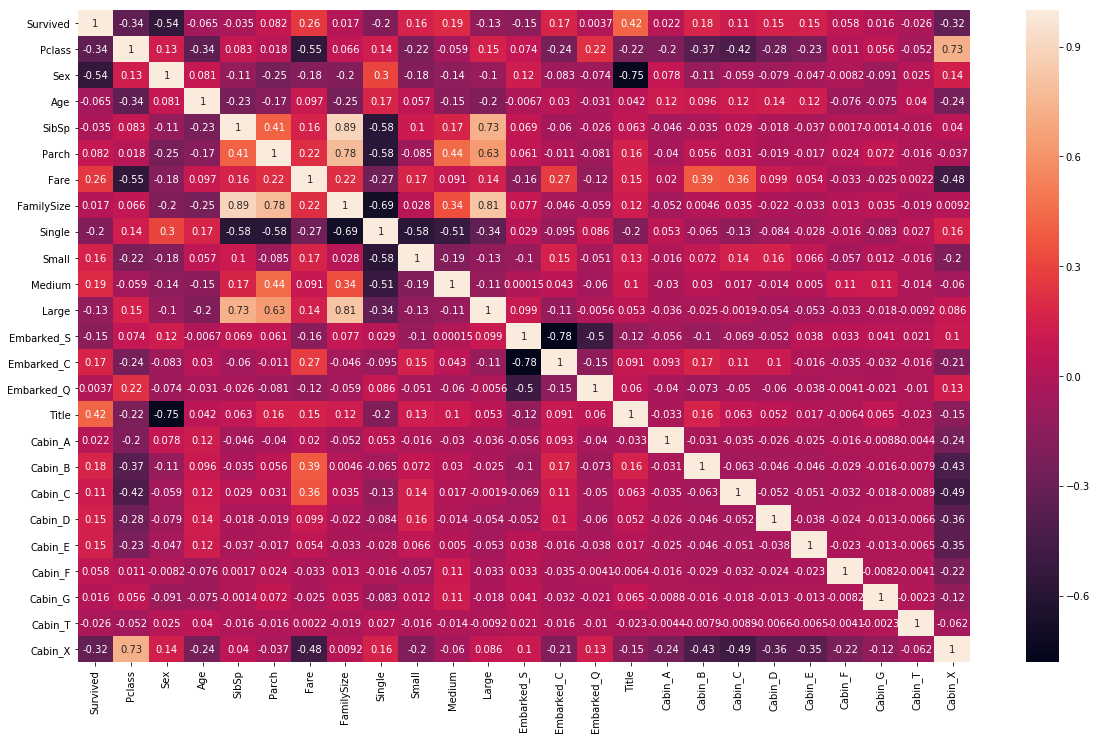

In [67]:
plt.figure(figsize=(20,12))
sns.heatmap(train.corr(),annot=True)

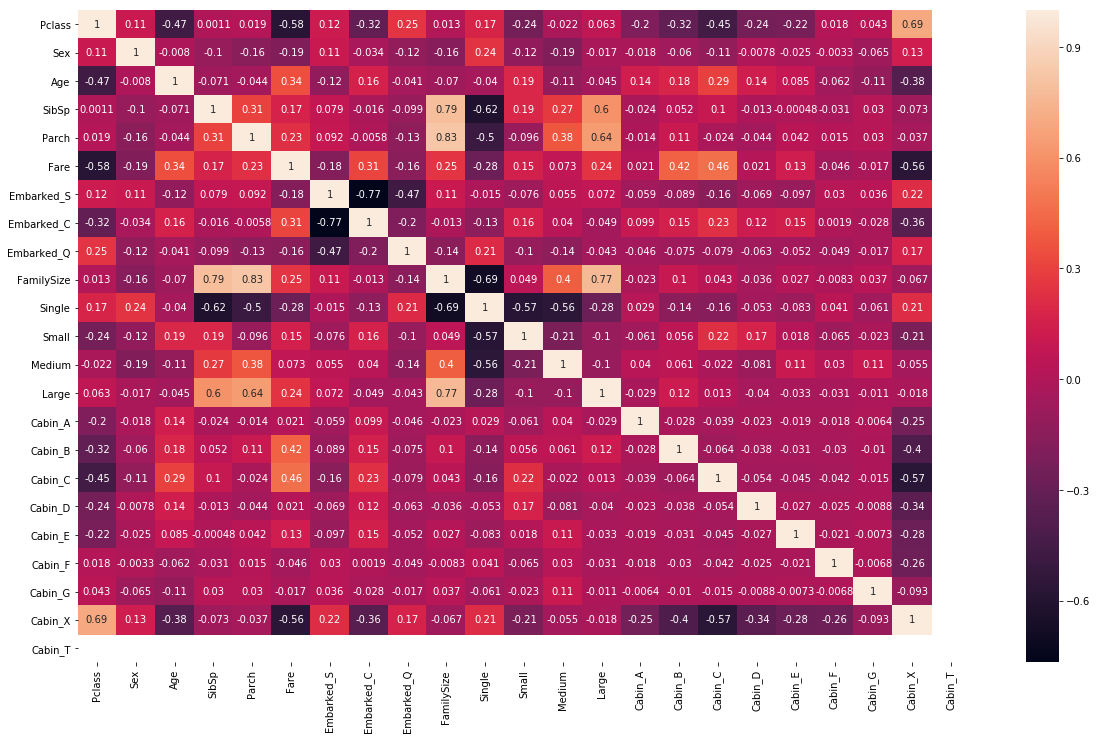

In [68]:
plt.figure(figsize=(20,12))
sns.heatmap(test.corr(),annot=True)

In [69]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Title,Embarked_S,Embarked_C,Embarked_Q,...,Large,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_X,Cabin_T
0,3,1,34.5,0,0,7.8292,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,3,0,47.0,1,0,7.0000,2,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2,1,62.0,0,0,9.6875,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,3,1,27.0,0,0,8.6625,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,3,0,22.0,1,1,12.2875,2,1,0,0,...,0,0,0,0,0,0,0,0,1,0



## Model building

In [70]:
len(train)

891

In [71]:
X_train = train.drop(['Survived'],axis=1)
y_train = train['Survived']
print('Shape of X_train is : ',X_train.shape)
print('Shape of Y_train is :',y_train.shape)

Shape of X_train is :  (891, 24)
Shape of Y_train is : (891,)


In [0]:
kfold = StratifiedKFold(n_splits=10)
classifiers = [
    SVC(),
    DecisionTreeClassifier(),
    AdaBoostClassifier(DecisionTreeClassifier(),learning_rate=0.1),
    RandomForestClassifier(n_estimators=50),
    GradientBoostingClassifier(),
    KNeighborsClassifier(),
    LogisticRegression(),
    LinearDiscriminantAnalysis(solver='eigen',shrinkage='auto'),
    MLPClassifier(learning_rate='adaptive')
]

In [0]:
import warnings
warnings.filterwarnings('ignore')
results = []
for classifier in classifiers:
  results.append(cross_val_score(estimator=classifier,X=X_train,y=y_train,cv=kfold,scoring='accuracy'))

In [74]:
results

[array([0.63333333, 0.66666667, 0.74157303, 0.76404494, 0.74157303,
        0.73033708, 0.76404494, 0.76404494, 0.75280899, 0.81818182]),
 array([0.73333333, 0.78888889, 0.70786517, 0.7752809 , 0.7752809 ,
        0.80898876, 0.82022472, 0.73033708, 0.86516854, 0.84090909]),
 array([0.68888889, 0.77777778, 0.69662921, 0.80898876, 0.82022472,
        0.78651685, 0.82022472, 0.71910112, 0.87640449, 0.88636364]),
 array([0.74444444, 0.83333333, 0.76404494, 0.80898876, 0.84269663,
        0.82022472, 0.79775281, 0.76404494, 0.83146067, 0.82954545]),
 array([0.8       , 0.78888889, 0.7752809 , 0.83146067, 0.8988764 ,
        0.82022472, 0.82022472, 0.78651685, 0.86516854, 0.85227273]),
 array([0.64444444, 0.72222222, 0.69662921, 0.71910112, 0.73033708,
        0.76404494, 0.74157303, 0.74157303, 0.71910112, 0.81818182]),
 array([0.8       , 0.83333333, 0.78651685, 0.86516854, 0.82022472,
        0.7752809 , 0.82022472, 0.82022472, 0.84269663, 0.81818182]),
 array([0.64444444, 0.68888889, 0.

In [75]:
mean = []
std = []
for result in results:
  mean.append(result.mean())
  std.append(result.std())

result_df = pd.DataFrame({'Cross Validation Mean':mean,'Cross Validation Error':std,'Algorithms':['Suppor vector classifier',
                                                                                                  'Decision Tree classifier',
                                                                                                  'AdaBoosting classifier',
                                                                                                  'Random forest classifier',
                                                                                                  'Gradient boosting',
                                                                                                  'K Neighbours classifier',
                                                                                                  'Logistic Regression classifier',
                                                                                                  'Linear discriminant analysis',
                                                                                                  'Multi layer perceptron classifier']})
result_df

,Cross Validation Mean,Cross Validation Error,Algorithms
0,0.737661,0.049810,Suppor vector classifier
1,0.784628,0.048145,Decision Tree classifier
2,0.788112,0.065600,AdaBoosting classifier
3,0.803654,0.032909,Random forest classifier
4,0.823891,0.037111,Gradient boosting
5,0.729721,0.042348,K Neighbours classifier
6,0.818185,0.024949,Logistic Regression classifier
7,0.703801,0.045352,Linear discriminant analysis
8,0.767923,0.056005,Multi layer perceptron classifier


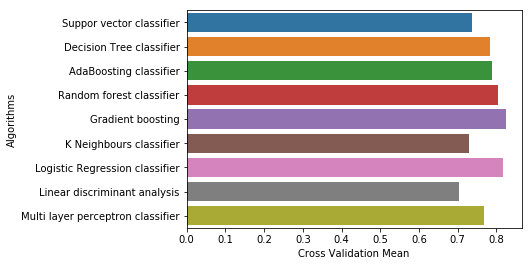

In [76]:
sns.barplot(x='Cross Validation Mean',y='Algorithms',data=result_df)

#### Hyper tuning parameters

We will only tune the classifiers which helped us getting higher accuracy

In [0]:
kfold = StratifiedKFold(n_splits=10)
classifiers = [
    AdaBoostClassifier(DecisionTreeClassifier(),learning_rate=1),
    RandomForestClassifier(n_estimators=50),
    GradientBoostingClassifier(),
    LogisticRegression()
]

In [0]:
ada_grid = {'base_estimator__criterion':['gini','entropy'],
           'base_estimator__splitter':['best','random'],
           'algorithm':['SAMME','SAMME.R'],
           'n_estimators':[1,2,3],
           'learning_rate':[0.01,0.1,0.5,1,1.3]}
random_grid = {'max_depth':[None],
              'max_features':[1,3,5,10,20],
              'min_samples_split':[2,4,6,8],
              'min_samples_leaf':[1,2,3,5],
              'n_estimators':[50,100,200],
              'criterion':['gini']}
gradient_grid = {'loss':['deviance'],  #exponential
                'learning_rate':[1,1.3],  #1,1.3
                'n_estimators':[200,250],  # 100
                'criterion':['mae','friedman_mse'],  #'friedman_mse'
                'min_samples_split':[3], #0.5,4
                'min_samples_leaf':[1,2], 
                'max_depth':[3],
                'max_features':['sqrt']}
logistic_grid = {'penalty':['l2'],
                'C':[0.4,0.5,0.6,0.7],
                'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
                'max_iter':[100,200,250,300]}

main_grid = [ada_grid,random_grid,gradient_grid,logistic_grid]

In [0]:
grid_results = list()
grid_best_estimator = list()
# for i in range(4):
#   grid_ = GridSearchCV(estimator=classifiers[i],param_grid=main_grid[i],cv=kfold,scoring='accuracy',n_jobs=4)
#   grid_.fit(X_train,y_train)
#   grid_results.append(grid_.best_score_)
#   grid_best_estimator.append(grid_.best_estimator_)
  
# grid_results

Dammmiddd ... taking too long to execute. ! ill pull one by one and execute !!

In [0]:
grid_ = GridSearchCV(estimator=classifiers[0],param_grid=main_grid[0],cv=kfold,scoring='accuracy')
grid_.fit(X_train,y_train)
grid_results.append(grid_.best_score_)
grid_best_estimator.append(grid_.best_estimator_)

In [81]:
grid_results

[0.8035914702581369]

In [82]:
grid_best_estimator

[AdaBoostClassifier(algorithm='SAMME.R',
           base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False, random_state=None,
             splitter='best'),
           learning_rate=0.5, n_estimators=2, random_state=None)]

In [0]:
grid_ = GridSearchCV(estimator=classifiers[1],param_grid=main_grid[1],cv=kfold,scoring='accuracy')
grid_.fit(X_train,y_train)
grid_results.append(grid_.best_score_)
grid_best_estimator.append(grid_.best_estimator_)

In [84]:
grid_results

[0.8035914702581369, 0.8383838383838383]

In [85]:
grid_best_estimator

[AdaBoostClassifier(algorithm='SAMME.R',
           base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False, random_state=None,
             splitter='best'),
           learning_rate=0.5, n_estimators=2, random_state=None),
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
             max_depth=None, max_features=10, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=2, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
             oob_score=False, random_state=None, verbose=0,
             warm_start=False)]

In [0]:
grid_ = GridSearchCV(estimator=classifiers[3],param_grid=main_grid[3],cv=kfold,scoring='accuracy')
grid_.fit(X_train,y_train)
grid_results.append(grid_.best_score_)
grid_best_estimator.append(grid_.best_estimator_)

In [87]:
grid_results

[0.8035914702581369, 0.8383838383838383, 0.819304152637486]

In [88]:
grid_best_estimator

[AdaBoostClassifier(algorithm='SAMME.R',
           base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False, random_state=None,
             splitter='best'),
           learning_rate=0.5, n_estimators=2, random_state=None),
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
             max_depth=None, max_features=10, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=2, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
             oob_score=False, random_state=None, verbose=0,
             warm_start=False),
 LogisticRegression(C=0.6, class_weight=None, dual=False, fit_intercept=True,
     

In [0]:
grid_ = GridSearchCV(estimator=classifiers[2],param_grid=main_grid[2],cv=kfold,scoring='accuracy')
grid_.fit(X_train,y_train)
grid_results.append(grid_.best_score_)
grid_best_estimator.append(grid_.best_estimator_)

In [90]:
grid_results

[0.8035914702581369, 0.8383838383838383, 0.819304152637486, 0.819304152637486]

In [91]:
grid_best_estimator

[AdaBoostClassifier(algorithm='SAMME.R',
           base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False, random_state=None,
             splitter='best'),
           learning_rate=0.5, n_estimators=2, random_state=None),
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
             max_depth=None, max_features=10, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=2, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
             oob_score=False, random_state=None, verbose=0,
             warm_start=False),
 LogisticRegression(C=0.6, class_weight=None, dual=False, fit_intercept=True,
     

I have shuffled the second index with third because the second classifier(that is : graient boosting classifier) takes too long to execute.

Now lets do a voting clssification to rate each of the best results estimators

In [92]:
from sklearn.ensemble import VotingClassifier
voting = VotingClassifier(estimators=[('Random_forest',grid_best_estimator[1]),
                                      ('Ada_boost',grid_best_estimator[0]),
                                      ('Gradient_boost',grid_best_estimator[3]),
                                      ('Logistic',grid_best_estimator[2])],
                         voting='hard')

voting.fit(X_train,y_train)

VotingClassifier(estimators=[('Random_forest', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=10, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
           ...enalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False))],
         flatten_transform=None, n_jobs=None, voting='hard', weights=None)

In [93]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Title,Embarked_S,Embarked_C,Embarked_Q,...,Large,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_X,Cabin_T
0,3,1,34.5,0,0,7.8292,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,3,0,47.0,1,0,7.0000,2,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2,1,62.0,0,0,9.6875,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,3,1,27.0,0,0,8.6625,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,3,0,22.0,1,1,12.2875,2,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [0]:
predictions = pd.Series(voting.predict(test),name='Survived')
results = pd.concat([ids,predictions],axis=1)
results.to_csv('Predictions.csv',index=False)

## thanks !! 

**Credits : Praveen kumar !!**

In [0]:
#@title
# LIST OF ALL THE ML ALGORITHMS I'LL TRY IN NEXT COMPETITION IF SUITABLE.

# MLA = [
#     #Ensemble Methods
#     ensemble.AdaBoostClassifier(),
#     ensemble.BaggingClassifier(),
#     ensemble.ExtraTreesClassifier(),
#     ensemble.GradientBoostingClassifier(),
#     ensemble.RandomForestClassifier(),

#     #Gaussian Processes
#     gaussian_process.GaussianProcessClassifier(),
    
#     #GLM
#     linear_model.LogisticRegressionCV(),
#     linear_model.PassiveAggressiveClassifier(),
#     linear_model.RidgeClassifierCV(),
#     linear_model.SGDClassifier(),
#     linear_model.Perceptron(),
    
#     #Navies Bayes
#     naive_bayes.BernoulliNB(),
#     naive_bayes.GaussianNB(),
    
#     #Nearest Neighbor
#     neighbors.KNeighborsClassifier(),
    
#     #SVM
#     svm.SVC(probability=True),
#     svm.NuSVC(probability=True),
#     svm.LinearSVC(),
    
#     #Trees    
#     tree.DecisionTreeClassifier(),
#     tree.ExtraTreeClassifier(),
    
#     #Discriminant Analysis
#     discriminant_analysis.LinearDiscriminantAnalysis(),
#     discriminant_analysis.QuadraticDiscriminantAnalysis(),

    
#     #xgboost: http://xgboost.readthedocs.io/en/latest/model.html
#     XGBClassifier()    
#     ]
